**Group Members:**

 _ |Names | Student Number
---|---|---
1| Bongumusa Mavuso | 1682836
2| Thabo Rachidi | 1632496
3| Thobelani Makeleni | 1199116
4| Siyabonga Hlomuka | 1384685

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
sns.set_theme(style="white")

import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings("ignore")


## Attribute Information
1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)
  - 1: building_windows_float_processed
  - 2: building_windows_non_float_processed
  - 3: vehicle_windows_float_processed
  - 4: vehicle_windows_non_float_processed (none in this database)
  - 5: containers
  - 6: tableware
  - 7: headlamps

In [2]:
columns= ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'GlassType']
df = pd.read_csv('data/glass/glass.data', names=columns)

In [3]:
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,GlassType
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# 1.1.1 Data cleaning and outliers

### Question 1

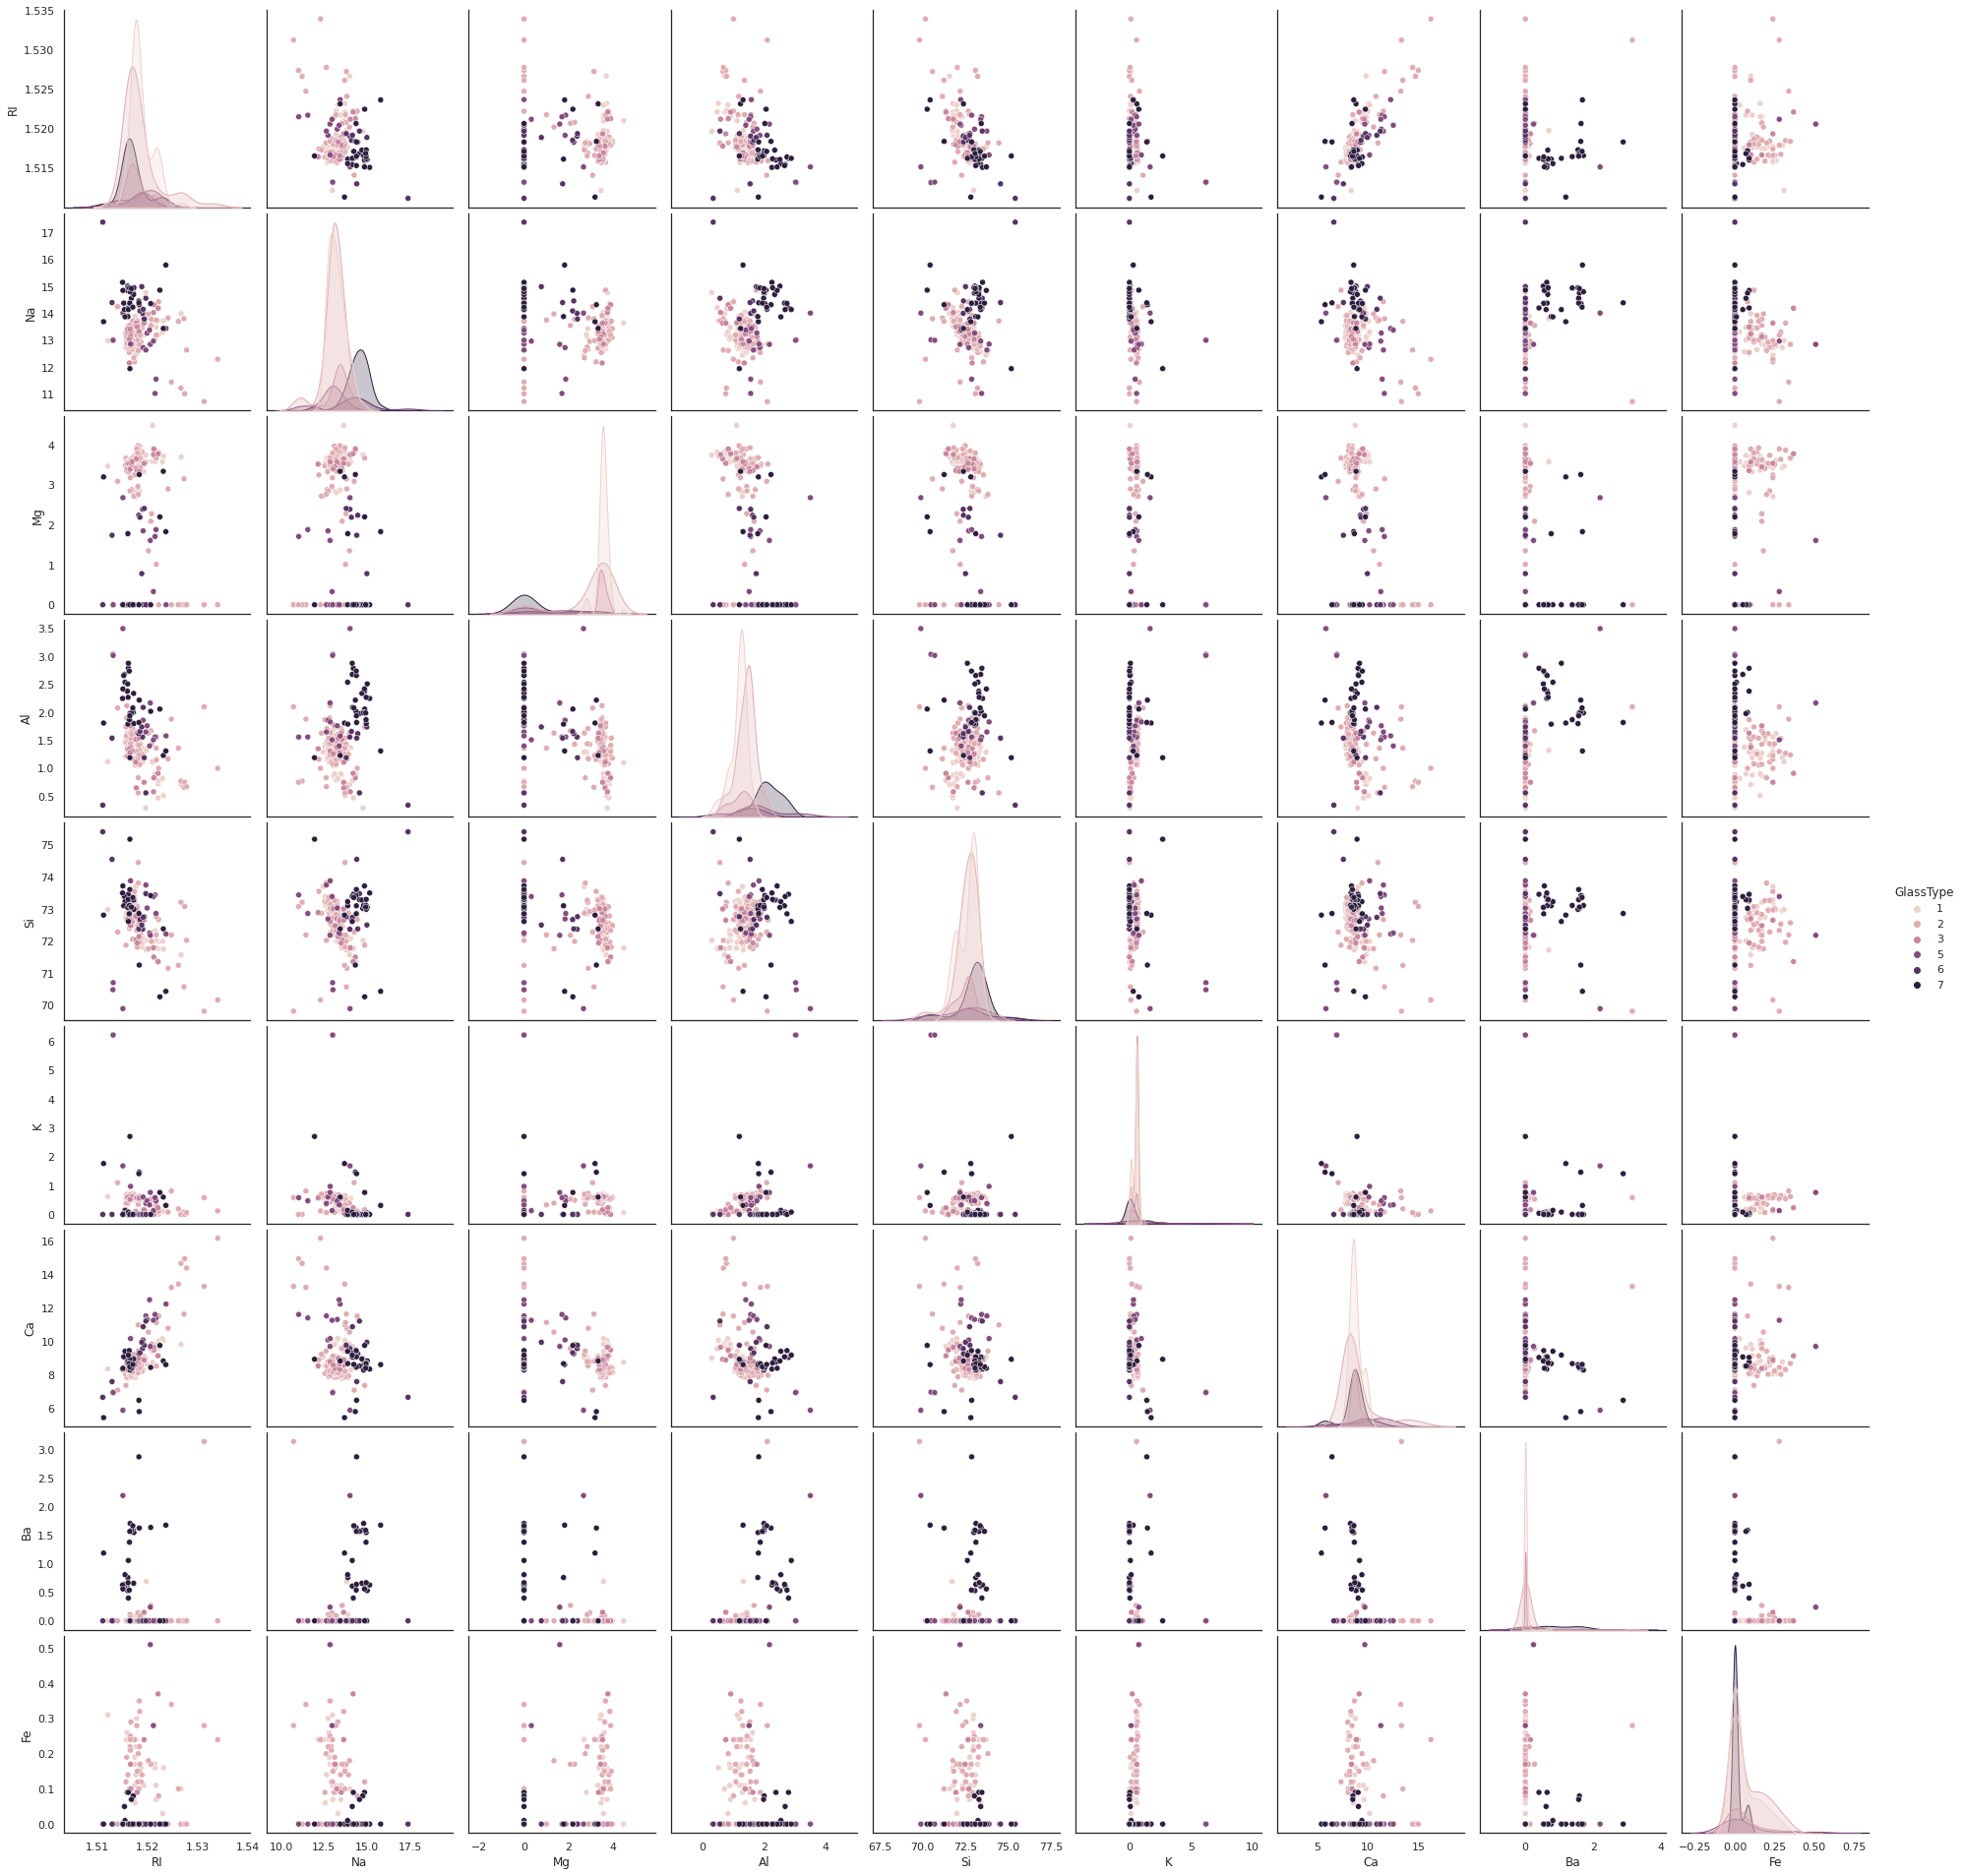

In [4]:
cols = columns[1:]
sns.pairplot(df[cols], hue='GlassType', height = 3)
plt.show()

**There is an observable difference in the glasses when it comes to Mg.**

**Observed positive correlation between reflective index and Ca.**

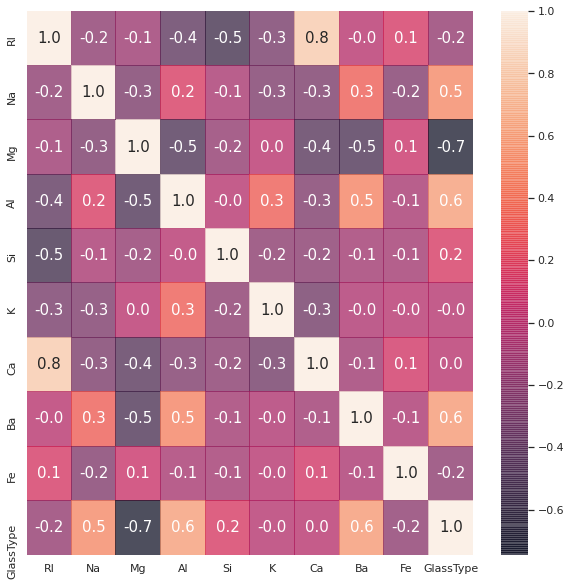

In [5]:
corr = df[cols].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cbar=True, annot=True, fmt='.1f', annot_kws={'size': 15}, alpha=0.7)
plt.show()

### Question 2

Text(0.5, 1.0, 'Calcium vs Reflective Index by Glasstype')

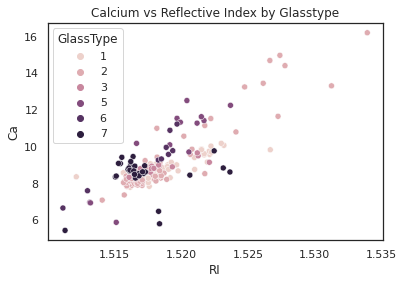

In [6]:
sns.scatterplot(x=df.RI, y=df.Ca, hue=df.GlassType).set_title('Calcium vs Reflective Index by Glasstype') #viewing the most correlated pair

In [7]:
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.histplot(dataset[column], kde=True)
            plt.xticks(rotation=25)
  

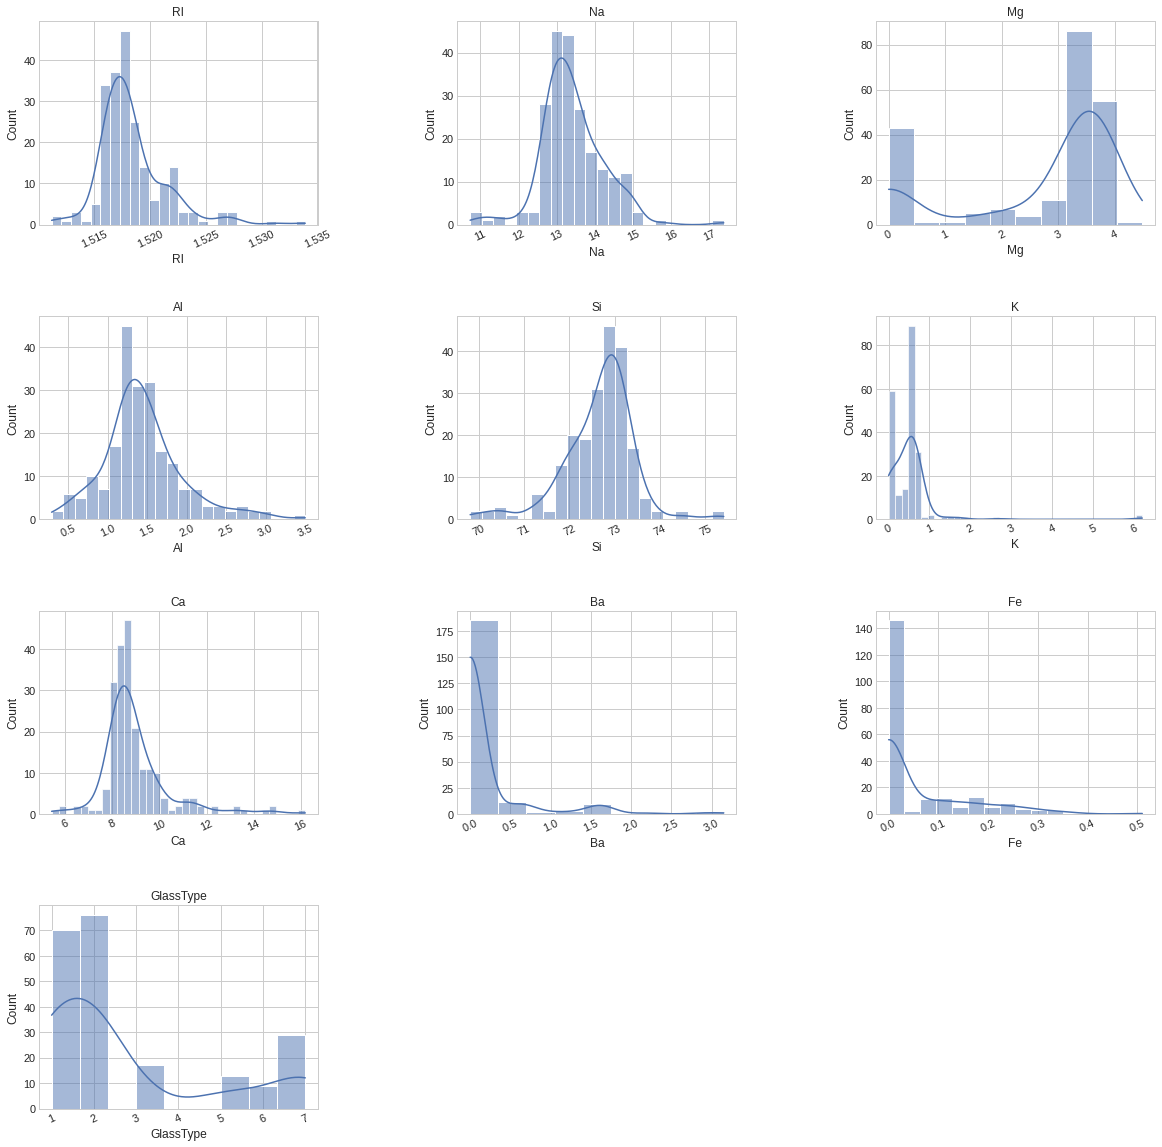

In [8]:
plot_distribution(df[cols], cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

- RI, Na, Al, Ca, Ba, Fe and the GlassType are negatively skewed.
- Mg, Si, and K are negatively skewed.

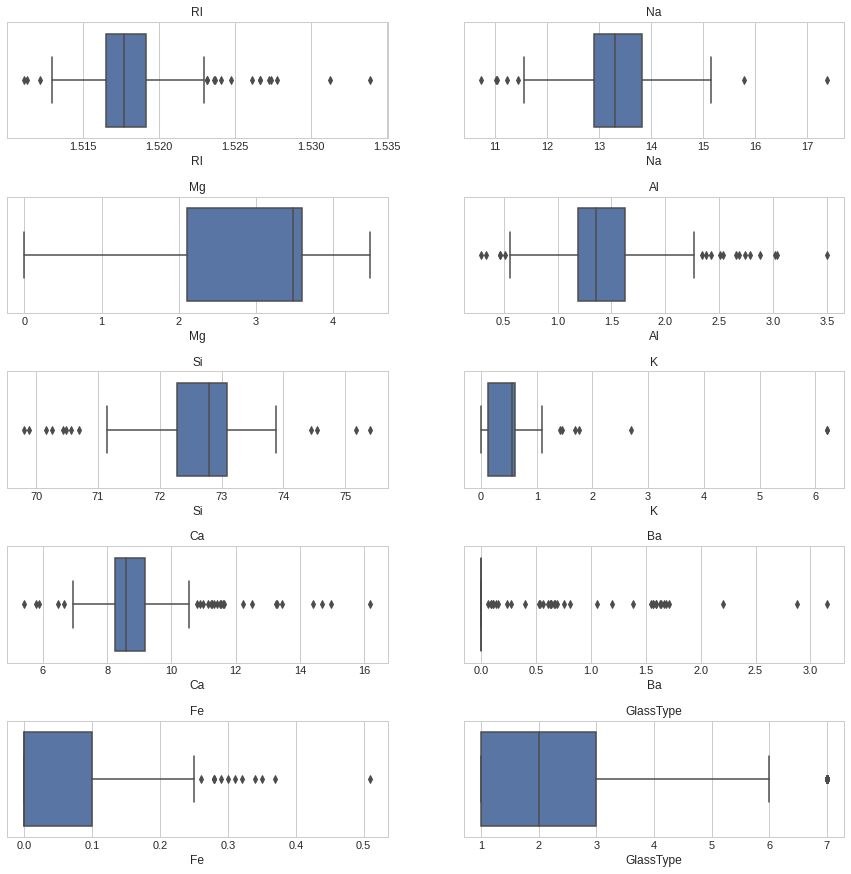

In [9]:
fig, axes = plt.subplots(nrows = 5, ncols = 2)  
axes = axes.flatten()         
fig.set_size_inches(15, 15)
fig.subplots_adjust(hspace=0.5)

for ax, col in zip(axes, df[cols]):
    sns.boxplot(x = df[col], ax = ax)
    ax.set_title(col)

- **Mg is the only feature without outliers.**

- **Ba has the most outliers.**

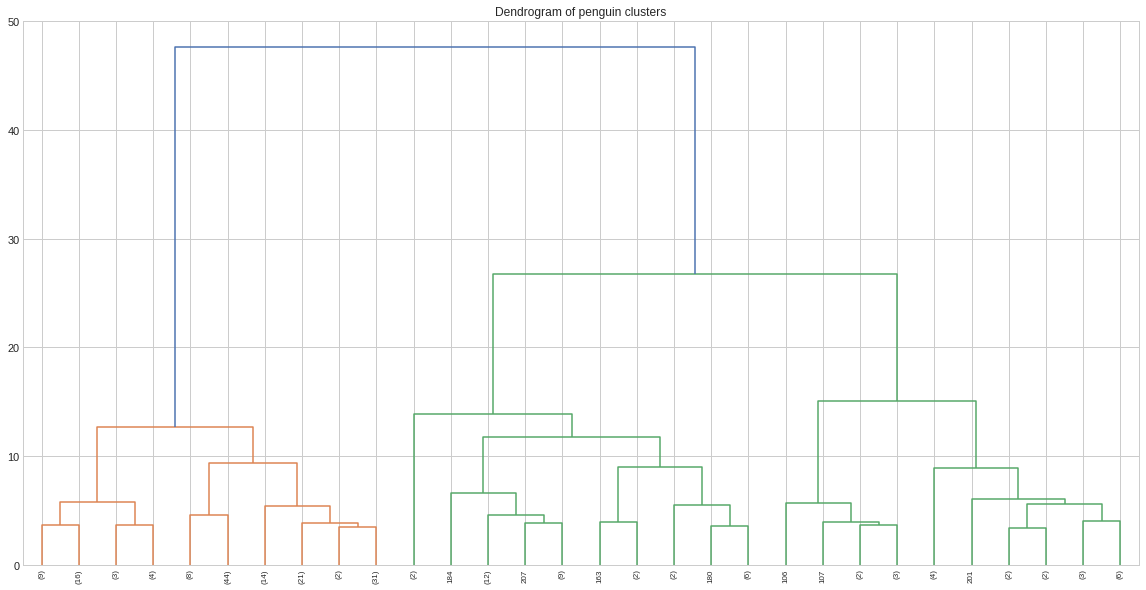

In [10]:
plt.figure(figsize=(20,10))
plt.title('Dendrogram of penguin clusters')
dfd = df[cols].copy()
dfd.dropna(inplace=True)

dend = shc.dendrogram(shc.linkage(dfd, method='ward'),
                     leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., truncate_mode='lastp')

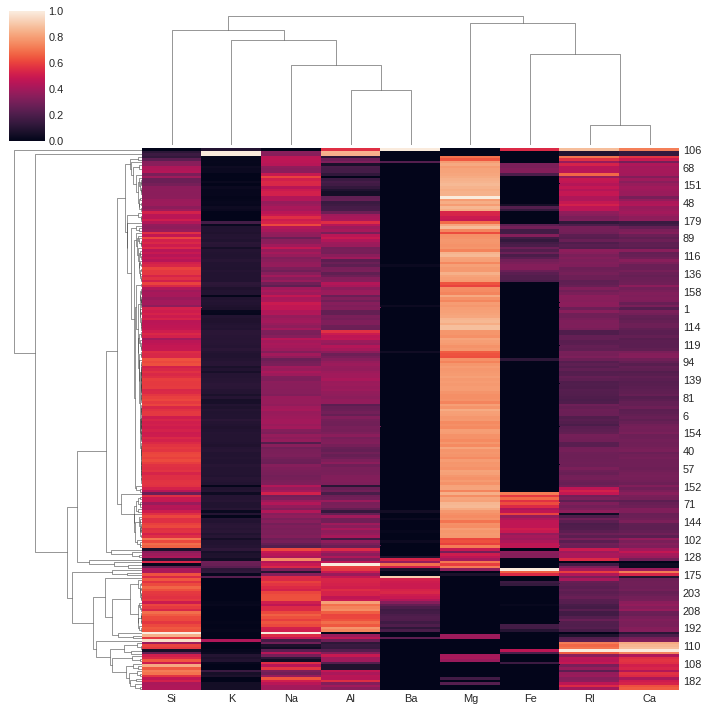

In [11]:
sns.clustermap(dfd[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']], metric="correlation", standard_scale=1)
plt.show()

**3. Normalizing the features to ensure they have the same scale will increase the efficiency of a classifier**